#theory question

1. What is K-Nearest Neighbors (KNN) and how does it work?


=KNN is a non-parametric, instance-based algorithm used for classification and regression.

Predicts output for a new point based on the ‘K’ nearest neighbors in the feature space.
Steps:

Choose number of neighbors
𝐾
K.

Calculate distance between new point and all training points.

Identify K nearest neighbors.

Classification: Majority vote.

Regression: Average or weighted average

2. Difference between KNN Classification and KNN Regression


=KNN can be used for both classification and regression, but the way it makes predictions differs. In KNN classification, the algorithm assigns a new data point to the class that is most common among its K nearest neighbors, essentially using a majority vote to determine the class label. On the other hand, in KNN regression, the algorithm predicts a continuous numerical value for the new data point by taking the average (or sometimes a weighted average) of the values of its K nearest neighbors. While classification deals with discrete outcomes like “spam” or “not spam,” regression predicts continuous outcomes such as house prices or temperatures. The core concept of using neighbors remains the same, but the output type and aggregation method differ.

3. Role of the distance metric in KNN

=Measures similarity between points (Euclidean, Manhattan, Minkowski, etc.).

Determines which points are nearest, affecting accuracy.

Choice depends on feature type and scale.

4. Curse of Dimensionality in KNN

=In high dimensions, all points become almost equidistant.

KNN relies on distance → performance drops.

Dimensionality reduction (e.g., PCA) is often needed.

5. How to choose the best value of K in KNN

Small
𝐾
K → overfitting, sensitive to noise.

Large
𝐾
K → underfitting, smooth predictions.

Use cross-validation to pick K with lowest error

6. What are KD Tree and Ball Tree in KNN

=KD Tree: Binary tree partitioning space along axis-aligned hyperplanes; efficient for low dimensions.

Ball Tree: Partitions space with hyperspheres; better for higher dimensions.

7. When to use KD Tree vs. Ball Tree

=KD Tree: Low-dimensional data (<20 features).

Ball Tree: High-dimensional data or when KD Tree is inefficient.

8. Disadvantages of KNN

Computationally expensive for large datasets.

Sensitive to irrelevant/noisy features.

Performance deteriorates in high dimensions.

Requires proper feature scaling.

No explicit model is learned → memory-heavy.

9. How does feature scaling affect KNN

KNN relies on distance. Features with larger ranges dominate without scaling.

Use Standardization or Min-Max Scaling to normalize all features.

10. How does KNN handle missing values in a dataset

Standard KNN cannot handle missing data directly.

Options:

Impute missing values (mean, median, or KNN imputer).

Remove points with missing features.

11. What is PCA

PCA is a dimensionality reduction technique that transforms features into a set of orthogonal principal components capturing maximum variance.

12. How does PCA work

Standardize data.

Compute covariance matrix.

Calculate eigenvalues and eigenvectors.

Sort eigenvectors by decreasing eigenvalues (variance).

Project data onto top components.

13. Geometric intuition behind PCA

PCA finds new axes (principal components) where data variance is maximized.

Essentially, it rotates the axes to align with directions of maximum spread.

14. Eigenvalues and Eigenvectors in PCA

Eigenvectors: Directions of principal components.

Eigenvalues: Variance magnitude along each eigenvector.

Larger eigenvalues → more important components.

15. How to decide the number of components to keep in PCA

Use explained variance ratio (e.g., keep 95% of variance).

Scree plot can visualize variance drop-off.

16. Can PCA be used for classification

PCA is unsupervised → doesn’t consider labels.

Can preprocess data before classification but is not a classifier itself.

17. Limitations of PCA

Captures only linear relationships.

Sensitive to feature scaling.

Not suitable for categorical data.

Can reduce interpretability of features.

18. Difference between Feature Selection and Feature Extraction:

=Feature selection and feature extraction are two approaches to reduce the dimensionality of a dataset, but they work differently. Feature selection involves choosing a subset of the original features based on certain criteria, such as correlation with the target variable or importance scores. This means you keep the most relevant existing features and discard the rest without altering them. In contrast, feature extraction creates entirely new features by transforming the original ones, often combining multiple features into fewer components that retain the most important information. Techniques like PCA or LDA are examples of feature extraction, where the goal is to reduce dimensionality while preserving as much variance or class-discriminative information as possible.

19. Key differences between PCA and LDA:

=Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) are both dimensionality reduction techniques, but they differ in purpose and methodology. PCA is unsupervised and focuses on capturing the directions of maximum variance in the data without considering class labels, producing principal components that summarize the dataset. LDA, on the other hand, is supervised and aims to maximize the separation between different classes, producing discriminant axes that enhance class separability. While PCA can reduce the dataset to any number of components, LDA is limited to at most the number of classes minus one. Essentially, PCA seeks to summarize the data’s variance, whereas LDA seeks to improve classification performance by leveraging label information.

20. How KNN and PCA complement each other

PCA reduces high-dimensional space → KNN becomes faster and more accurate.

Reduces noise and irrelevant features → improves KNN performance.

#practical question

1. Train a KNN Classifier on the Iris dataset and print model accuracy

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


2. Train a KNN Regressor on a synthetic dataset and evaluate using MSE

In [2]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=5, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 1403.5974845523126


3. Train a KNN Classifier using different distance metrics (Euclidean vs Manhattan) and compare accuracy

In [3]:
knn_euclidean = KNeighborsClassifier(metric='euclidean')
knn_manhattan = KNeighborsClassifier(metric='manhattan')

knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)

acc_euclidean = accuracy_score(y_test, knn_euclidean.predict(X_test))
acc_manhattan = accuracy_score(y_test, knn_manhattan.predict(X_test))

print("Euclidean Accuracy:", acc_euclidean)
print("Manhattan Accuracy:", acc_manhattan)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

4. Train a KNN Classifier with different values of K and visualize decision boundaries

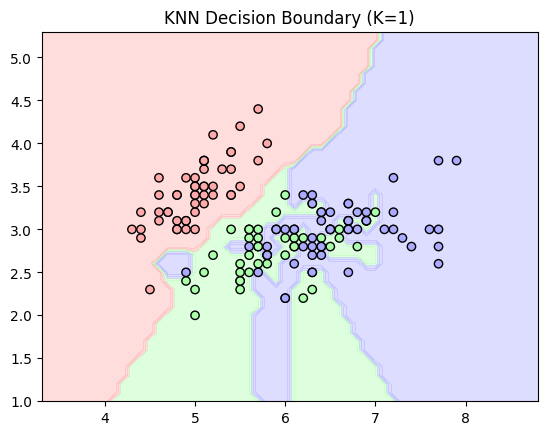

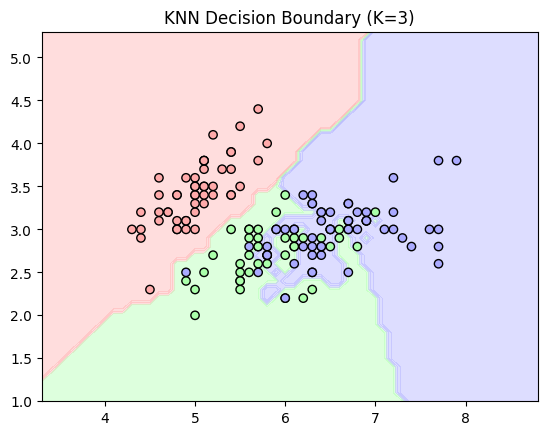

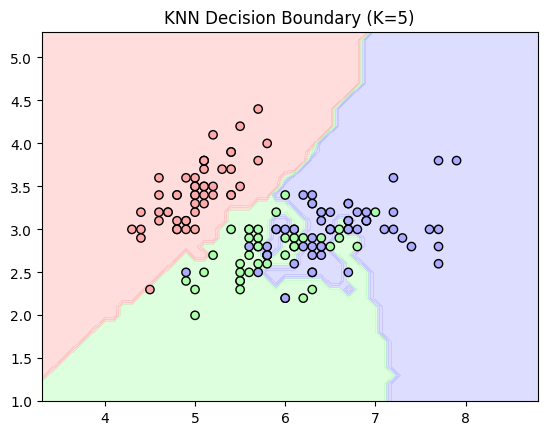

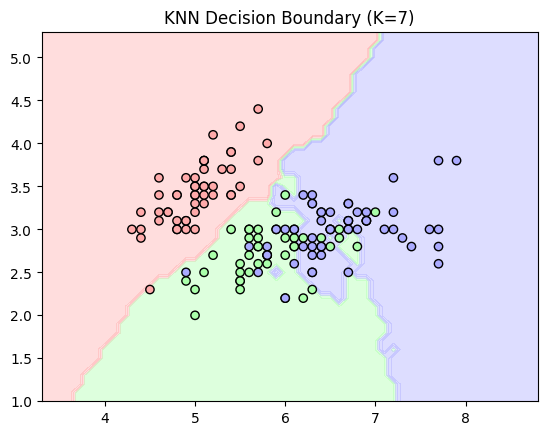

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Using only 2 features for visualization
X_vis = iris.data[:, :2]
y_vis = iris.target

k_values = [1, 3, 5, 7]
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_vis, y_vis)

    # Plot decision boundary
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap, edgecolor='k')
    plt.title(f"KNN Decision Boundary (K={k})")
plt.show()


5. Apply Feature Scaling before training a KNN model and compare results with unscaled data

In [5]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled = KNeighborsClassifier(n_neighbors=5)

knn_unscaled.fit(X_train, y_train)
knn_scaled.fit(X_train_scaled, y_train)

print("Accuracy without scaling:", accuracy_score(y_test, knn_unscaled.predict(X_test)))
print("Accuracy with scaling:", accuracy_score(y_test, knn_scaled.predict(X_test_scaled)))


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

6. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py", line 239, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_base.py", line 508, in _fit
    check_classification_targets(y)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/multiclass.py", line 222, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


7. Train a KNN Classifier and check the number of misclassified samples

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

misclassified = np.sum(y_test != y_pred)
print("Number of misclassified samples:", misclassified)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

8. Train a KNN Classifier using different values of the weights parameter (uniform vs distance) and compare accuracy

In [8]:
knn_uniform = KNeighborsClassifier(weights='uniform')
knn_distance = KNeighborsClassifier(weights='distance')

knn_uniform.fit(X_train_scaled, y_train)
knn_distance.fit(X_train_scaled, y_train)

print("Uniform weights accuracy:", accuracy_score(y_test, knn_uniform.predict(X_test_scaled)))
print("Distance weights accuracy:", accuracy_score(y_test, knn_distance.predict(X_test_scaled)))


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

9. Train a KNN Regressor and analyze the effect of different K values on performance

In [9]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"K={k} -> MSE: {mse}")


K=1 -> MSE: 1915.5378438354994
K=3 -> MSE: 1491.0991363343805
K=5 -> MSE: 1403.5974845523126
K=7 -> MSE: 1500.547246140241
K=9 -> MSE: 1602.448796360015


10. Implement KNN Imputation for handling missing values in a dataset

In [10]:
import numpy as np
from sklearn.impute import KNNImputer

X_missing = X_train.copy()
X_missing[0:5, 0] = np.nan  # introduce missing values

imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_missing)
print("First 5 rows after KNN Imputation:\n", X_imputed[:5])


First 5 rows after KNN Imputation:
 [[-0.2117611  -0.38508228 -0.676922    0.32408397  0.61167629]
 [-0.08780855 -0.83921752 -0.30921238  0.93128012  0.33126343]
 [-0.1302947   0.23561456  0.77086519 -2.21113531 -1.47858625]
 [-0.0832431   1.1593298  -1.08106333 -0.36096617  0.61593561]
 [ 0.85913966  0.22213377 -0.47874862 -0.30917212  1.25575613]]


11. Train a KNN Classifier using KD Tree and Ball Tree algorithms and compare performance

In [11]:
knn_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_ball = KNeighborsClassifier(algorithm='ball_tree')

knn_kd.fit(X_train_scaled, y_train)
knn_ball.fit(X_train_scaled, y_train)

print("KD Tree accuracy:", accuracy_score(y_test, knn_kd.predict(X_test_scaled)))
print("Ball Tree accuracy:", accuracy_score(y_test, knn_ball.predict(X_test_scaled)))


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

12. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

In [12]:
from sklearn.metrics import classification_report

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

13. Train a KNN Classifier with different leaf_size values and compare accuracy

In [13]:
for leaf in [10, 20, 30, 40, 50]:
    knn = KNeighborsClassifier(leaf_size=leaf)
    knn.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    print(f"Leaf size={leaf} -> Accuracy: {acc}")


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

14. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

In [14]:
from sklearn.datasets import load_wine
wine = load_wine()
X_wine, y_wine = wine.data, wine.target
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_w = scaler.fit_transform(X_train_w)
X_test_w = scaler.transform(X_test_w)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_w, y_train_w)
y_pred_w = knn.predict(X_test_w)

print(classification_report(y_test_w, y_pred_w))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



15. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

In [15]:
for metric in ['euclidean', 'manhattan']:
    knn_reg = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    print(f"{metric} -> MSE: {mean_squared_error(y_test, y_pred)}")


euclidean -> MSE: 1403.5974845523126
manhattan -> MSE: 1524.0981256746754


16. Train a KNN Classifier and evaluate using ROC-AUC score

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_train, classes=[0,1,2])
y_test_bin = label_binarize(y_test, classes=[0,1,2])

knn.fit(X_train_scaled, y_train)
y_pred_prob = knn.predict_proba(X_test_scaled)

roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro')
print("ROC-AUC Score:", roc_auc)


ValueError: continuous target data is not supported with label binarization

17. Train a KNN Classifier and visualize the decision boundary

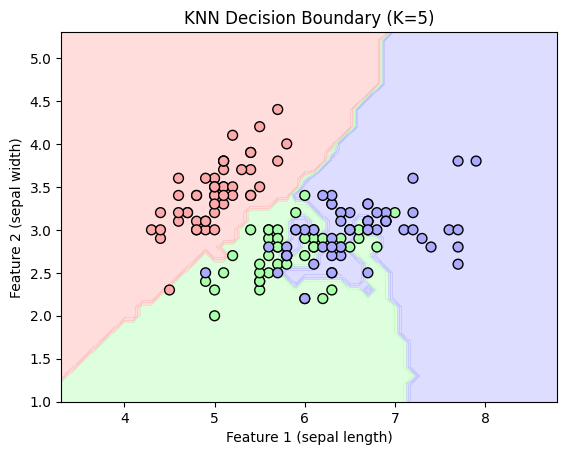

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Load dataset
iris = load_iris()
X = iris.data[:, :2]  # use only first two features for 2D visualization
y = iris.target

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create meshgrid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=50)
plt.xlabel('Feature 1 (sepal length)')
plt.ylabel('Feature 2 (sepal width)')
plt.title('KNN Decision Boundary (K=5)')
plt.show()


18. Train a KNN Classifier and perform feature selection before training

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=2)
X_train_sel = selector.fit_transform(X_train_scaled, y_train)
X_test_sel = selector.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sel, y_train)
print("Accuracy after feature selection:", accuracy_score(y_test, knn.predict(X_test_sel)))


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.